# **Pyspark in Colab**

Some notes on Pyspark:

To run spark in Colab, we need to first install the following dependencies in Colab environment, that is;

* Apache Spark 3.0.3 
* Hadoop 2.7, 
* Java 8 
* Findspark (to locate the spark in the system). 

---
**Reading Datasets with Spark** 
---

1. **Eager Mode:** 

Like Python Pandas, when reading CSV files into dataframes,  all of the data is **usually loaded into memory** before the next step commences execution. Here Spark performs the operation in an eager mode.

2. **Lazy Approach:**

The opposite occurs using the Lazy Approach, files are usually read in the **parquet format.**

**Best Practice:** It's best to avoid reading your datasets via eager operations/mode when working with Spark, except if it's a small csv dataset, however it's best to avoid the eager mode. Say you need to process large CSV files/dataset, *first transform the dataset to parquet format before executing the rest of the pipeline.*



---
**Writing Data with Spark**
---

Like reading data with Spark, **it’s also not advisable to write your data to your local storage when using PySpark. Rather, make use of a distributed file system such as Hadoop Distributed File System (HDFS) or S3.** 

The parquet is a good format to use for saving dataframes especially if you are going to be processing the results with Spark.

HDFS file formats supported are Json, Avro and Parquet.



---
**Types of Processing**
---

**Batch & Streaming** data pipelines.

---
**Data Transformation**
---

Spark has **dataframe operations** for *tasks such as adding new columns, dropping columns, joins, and analytics statistics,*.

Easy way to getting started spark dataframe operations is by using **Spark SQL**. 


Spark SQL operations are performed in a lazy execution mode, this implies that the SQL steps won’t be processed until an output is required. 


---
**Machine Learning with PySpark**
---

We use the MLIB library. **MLlib** is the preferred library because it natively operates on Spark dataframes.

Setting up your dataframe with a vector of features and a label as a scalar is a required step befoe fitting to train the model.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!tar xf spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark

### **Set the environment path:**

This will enable me to run Pyspark in my Colab environment. 

We can set the location of Java and Spark by running the following codes:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

**Test Installation:**

Run a local spark session

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate() #Creating SparkSession

# **Data Extraction**

I'll load my dataset from Kaggle, some big data task would require extracting dataset from AWS S3, Databases such as Redshift, MongDB etc.

Dataset Source: https://www.kaggle.com/arjunbhasin2013/ccdata 

In [ ]:
! pip install kaggle #install kaggle library
! mkdir ~/.kaggle #make a directory for Kaggle

In [ ]:
cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json #copy the “kaggle.json” file from the mounted google drive to the current instance storage

In [ ]:
! kaggle datasets download arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 11.2MB/s]


In [ ]:
! unzip ccdata

Archive:  ccdata.zip
  inflating: CC GENERAL.csv          


## **Dataset Information**

The Dataset summarizes the usage behavior of about **9000 active credit card** holders during the **last 6 months**. The file is at a customer level **with 18 behavioral variables.**



---

Following is the Data Dictionary for Credit Card dataset :-


* CUSTID : Identification of Credit Card holder (Categorical)

* BALANCE : Balance amount left in their account to make purchases 

* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

* PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go

* INSTALLMENTS PURCHASES : Amount of purchase done in installment

* CASHADVANCE : Cash in advance given by the user

* PURCHASES FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

* ONEOFF PURCHASES FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

* PURCHASES INSTALLMENTS FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

* CASHADVANCE FREQUENCY : How frequently the cash in advance being paid

* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

* PURCHASESTRX : Numbe of purchase transactions made

* CREDITLIMIT : Limit of Credit Card for user

* PAYMENTS : Amount of Payment done by user

* MINIMUM_PAYMENTS : Minimum amount of payments made by user

* PRCFULLPAYMENT : Percent of full payment paid by user

* TENURE : Tenure of credit card service for user

## **Load Dataset into Google Colab**

Let's load the dataset into our Colab directory in **spark dataframe format**.

In [ ]:
!ls
# Confirm whether the datasets are properly loaded as well as other previous installations.

 ccdata.zip	   drive	 spark-3.0.3-bin-hadoop2.7
'CC GENERAL.csv'   sample_data	 spark-3.0.3-bin-hadoop2.7.tgz


## **Data Extraction & Investigation Phase**

In [ ]:
#dataset = spark.read.csv('CC GENERAL.csv',inferSchema=True, header =True)

#inferSchema = InferSchema enables us to infer automatically different data types for each column.

#or 

# Load data from a CSV
file_location = "CC GENERAL.csv" 
df = spark.read.format("CSV").option("inferSchema", True).option("header", True).load(file_location)
display(df.take(5))

[Row(CUST_ID='C10001', BALANCE=40.900749, BALANCE_FREQUENCY=0.818182, PURCHASES=95.4, ONEOFF_PURCHASES=0.0, INSTALLMENTS_PURCHASES=95.4, CASH_ADVANCE=0.0, PURCHASES_FREQUENCY=0.166667, ONEOFF_PURCHASES_FREQUENCY=0.0, PURCHASES_INSTALLMENTS_FREQUENCY=0.083333, CASH_ADVANCE_FREQUENCY=0.0, CASH_ADVANCE_TRX=0, PURCHASES_TRX=2, CREDIT_LIMIT=1000.0, PAYMENTS=201.802084, MINIMUM_PAYMENTS=139.509787, PRC_FULL_PAYMENT=0.0, TENURE=12),
 Row(CUST_ID='C10002', BALANCE=3202.467416, BALANCE_FREQUENCY=0.909091, PURCHASES=0.0, ONEOFF_PURCHASES=0.0, INSTALLMENTS_PURCHASES=0.0, CASH_ADVANCE=6442.945483, PURCHASES_FREQUENCY=0.0, ONEOFF_PURCHASES_FREQUENCY=0.0, PURCHASES_INSTALLMENTS_FREQUENCY=0.0, CASH_ADVANCE_FREQUENCY=0.25, CASH_ADVANCE_TRX=4, PURCHASES_TRX=0, CREDIT_LIMIT=7000.0, PAYMENTS=4103.032597, MINIMUM_PAYMENTS=1072.340217, PRC_FULL_PAYMENT=0.222222, TENURE=12),
 Row(CUST_ID='C10003', BALANCE=2495.148862, BALANCE_FREQUENCY=1.0, PURCHASES=773.17, ONEOFF_PURCHASES=773.17, INSTALLMENTS_PURCHASES=0

In [ ]:
#txt_file = spark.read.text("example.txt") #reading txt in spark
#json_file = spark.read.json("sample.json", multiLine=True) #reading json in spark 

In [ ]:
display(df.take(8))

[Row(CUST_ID='C10001', BALANCE=40.900749, BALANCE_FREQUENCY=0.818182, PURCHASES=95.4, ONEOFF_PURCHASES=0.0, INSTALLMENTS_PURCHASES=95.4, CASH_ADVANCE=0.0, PURCHASES_FREQUENCY=0.166667, ONEOFF_PURCHASES_FREQUENCY=0.0, PURCHASES_INSTALLMENTS_FREQUENCY=0.083333, CASH_ADVANCE_FREQUENCY=0.0, CASH_ADVANCE_TRX=0, PURCHASES_TRX=2, CREDIT_LIMIT=1000.0, PAYMENTS=201.802084, MINIMUM_PAYMENTS=139.509787, PRC_FULL_PAYMENT=0.0, TENURE=12),
 Row(CUST_ID='C10002', BALANCE=3202.467416, BALANCE_FREQUENCY=0.909091, PURCHASES=0.0, ONEOFF_PURCHASES=0.0, INSTALLMENTS_PURCHASES=0.0, CASH_ADVANCE=6442.945483, PURCHASES_FREQUENCY=0.0, ONEOFF_PURCHASES_FREQUENCY=0.0, PURCHASES_INSTALLMENTS_FREQUENCY=0.0, CASH_ADVANCE_FREQUENCY=0.25, CASH_ADVANCE_TRX=4, PURCHASES_TRX=0, CREDIT_LIMIT=7000.0, PAYMENTS=4103.032597, MINIMUM_PAYMENTS=1072.340217, PRC_FULL_PAYMENT=0.222222, TENURE=12),
 Row(CUST_ID='C10003', BALANCE=2495.148862, BALANCE_FREQUENCY=1.0, PURCHASES=773.17, ONEOFF_PURCHASES=773.17, INSTALLMENTS_PURCHASES=0

### **Checking Schema of PySpark DataFrames**

In [ ]:
df.printSchema() # to print data types for the columns
#txt_file.printSchema()
#json_file.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



### **Checking DataTypes of PySpark DataFrames**

In [ ]:
print(type(df)) #csv file
#print(type(txt_file))
#print(type(json_file))

<class 'pyspark.sql.dataframe.DataFrame'>


### **Reading Multiple Files as Once**

In [ ]:
#files = ['Fish.csv', 'Salary.csv']
#df = spark.read.csv(files, sep = ',' ,  inferSchema=True, header=True)

## **Writing Data -Saving into Parquet**

Remember, if we are going to be processing the results with Spark, then parquet is a good format to use for saving dataframes.

**To save into Parquet**

`f.write.save('/FileStore/parquet/file-name', format='parquet')`

**To save into csv with Spark**

`df.write.save('/fith-path.csv', format='csv')`

In [ ]:
# DBFS  Databricks file store (DBFS)
# HDFS 
df.write.save('Obi_emodi_big_data_project', format='parquet')

### **Reading Parquet**

In [ ]:
data_test = spark.read.parquet("Obi_emodi_big_data_project") #game_stats - defining new name for storage
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.html (spark dataframe)

In [ ]:
display(data_test.take(5)) #parquet

[Row(CUST_ID='C10001', BALANCE=40.900749, BALANCE_FREQUENCY=0.818182, PURCHASES=95.4, ONEOFF_PURCHASES=0.0, INSTALLMENTS_PURCHASES=95.4, CASH_ADVANCE=0.0, PURCHASES_FREQUENCY=0.166667, ONEOFF_PURCHASES_FREQUENCY=0.0, PURCHASES_INSTALLMENTS_FREQUENCY=0.083333, CASH_ADVANCE_FREQUENCY=0.0, CASH_ADVANCE_TRX=0, PURCHASES_TRX=2, CREDIT_LIMIT=1000.0, PAYMENTS=201.802084, MINIMUM_PAYMENTS=139.509787, PRC_FULL_PAYMENT=0.0, TENURE=12),
 Row(CUST_ID='C10002', BALANCE=3202.467416, BALANCE_FREQUENCY=0.909091, PURCHASES=0.0, ONEOFF_PURCHASES=0.0, INSTALLMENTS_PURCHASES=0.0, CASH_ADVANCE=6442.945483, PURCHASES_FREQUENCY=0.0, ONEOFF_PURCHASES_FREQUENCY=0.0, PURCHASES_INSTALLMENTS_FREQUENCY=0.0, CASH_ADVANCE_FREQUENCY=0.25, CASH_ADVANCE_TRX=4, PURCHASES_TRX=0, CREDIT_LIMIT=7000.0, PAYMENTS=4103.032597, MINIMUM_PAYMENTS=1072.340217, PRC_FULL_PAYMENT=0.222222, TENURE=12),
 Row(CUST_ID='C10003', BALANCE=2495.148862, BALANCE_FREQUENCY=1.0, PURCHASES=773.17, ONEOFF_PURCHASES=773.17, INSTALLMENTS_PURCHASES=0

### **Contents of PySpark DataFrame**

In [ ]:
df.show() #from csv

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
| C10001|  40.900749|         0.818182|     95.4|             0.0|                  95.4|  

In [ ]:
data_test.show() #parquet 

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
| C10001|  40.900749|         0.818182|     95.4|             0.0|                  95.4|  

In [ ]:
print((data_test.count(), len(data_test.columns)))

(8950, 18)


In [ ]:
data_test.columns

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

### **PySpark DataFrame to Pandas DataFrame**

One advantage is for more EDA:

If needed, we can use the toPandas() function to create a Pandas dataframe on the driver node, which means that any Python plotting library can be used for visualizing the results. However, **this approach should be used for only small dataframes, since all of the data is eagerly fetched into memory on the driver node.**

In [ ]:
#df = csv_file.toPandas() #convert the PySpark DataFrame into a Pandas DataFrame
df_topandas = data_test.toPandas() # or use df (csv)

In [ ]:
df_topandas

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df_topandas.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
type(df_topandas)

pandas.core.frame.DataFrame

In [ ]:
df_topandas.fillna(0, inplace=True)

In [ ]:
df_topandas.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### **Convert Pandas DF to Spark DF**

Spark provides a createDataFrame(pandas_dataframe) method to convert pandas to Spark DataFrame, 

In [ ]:
from pyspark.sql import SparkSession

#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("test") \
    .getOrCreate()

#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(df_topandas) 
sparkDF.printSchema()
sparkDF.show()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: long (nullable = true)
 |-- PURCHASES_TRX: long (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: long (nullable = true)

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------

**Taking it back to Parquet**

In [ ]:
# HDFS 
sparkDF.write.save('big_data_Project', format='parquet')

**Reading Parquet**




In [ ]:
data_test = spark.read.parquet("big_data_Project") #game_stats - defining new name for storage
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.html (spark dataframe)

# **Machine Learning in Pyspark**

Machine Learning Library (SPark) - MLlib

The pandas Scikit-learn used for machine learning is great, however it does not scale to large data sets in a distributed environment.

This notebook considers these ML Approaches;

1. **Supervised Learning with Pyspark**: 

  > **Regression Model** (Linear)

  > **Classification Model** (Logistic Regression)

2. **Unspervised Learning with Pyspark**

  > **Clustering** (Bisecting  K-means) etc



---
The steps to building and using a machine learning model are:


* **Define/Algorithm Selection**: What type of model will it be? A linear regression? Some other type of model? Some other parameters of the model type are specified too.

* **Fit:** Capture patterns from provided data. This is the heart of modeling.

* **Predict:** Test your model and predict

* **Evaluate:** Determine how accurate the model's predictions are.



In order to use **one of the supervised algorithms in MLlib, we need to set up our dataframe with a vector of features and a label as a scalar.** Once done, I can use the fit function to train the model. 

## **Linear Regression Model**

In [ ]:
#MLlib imports 
#dependencies
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

**Handling Missing Values with Pyspark**

In [ ]:
### Get count of both null and missing values in pyspark

from pyspark.sql.functions import isnan, when, count, col

data_test.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_test.columns]).show()

+-------+-------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+--------+----------------+----------------+------+
|CUST_ID|BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+--------+----------------+----------------+------+
|      0|      0|                0|        0|               0|                     0|           0|              

In [ ]:
data_test.columns #to determine X features for our linear regression prediction

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

#### **Feature Selection:** 

`CUST_ID, BALANCE, PURCHASES, ONEOFF_PURCHASES, CREDIT_LIMIT, MINIMUM_PAYMENTS` (their index)

**Target (Y)** is `Payments` (to predict payments per user)


### **PS**: **Confirm Data Types**

**VectorAssembler Transformer does not take strings**

**Vector Assembler** is a transformer that assembles all the features into one vector from multiple columns that contain type double. 

We will use a **StringIndexer** if any of the columns contains string values to convert it into *numeric values*

### **Using the String Indexer to Convert (String to Numeric)**


*'The best way that I've found to do it is to combine several StringIndex on a list and use a Pipeline to execute them all':* https://stackoverflow.com/questions/36942233/apply-stringindexer-to-several-columns-in-a-pyspark-dataframe

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(data_test) for column in list(set(data_test.columns)-set(['index'])) ]


pipeline = Pipeline(stages=indexers)
df_r = pipeline.fit(data_test).transform(data_test)

df_r.show()

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------------------+------------------+--------------------------------------+------------------+-------------------+-------------+----------------------+----------------------+-------------+----------------------+----------------------------+---------------+-----------------------+-------------------------+--------------+----------------------+----------------------------+------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|

In [ ]:
df_r.columns

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'ONEOFF_PURCHASES_FREQUENCY_index',
 'CASH_ADVANCE_index',
 'PURCHASES_INSTALLMENTS_FREQUENCY_index',
 'CREDIT_LIMIT_index',
 'PURCHASES_TRX_index',
 'CUST_ID_index',
 'CASH_ADVANCE_TRX_index',
 'MINIMUM_PAYMENTS_index',
 'BALANCE_index',
 'PRC_FULL_PAYMENT_index',
 'INSTALLMENTS_PURCHASES_index',
 'PURCHASES_index',
 'BALANCE_FREQUENCY_index',
 'PURCHASES_FREQUENCY_index',
 'PAYMENTS_index',
 'ONEOFF_PURCHASES_index',
 'CASH_ADVANCE_FREQUENCY_index',
 'TENURE_index']

In [ ]:
print((df_r.count(), len(df_r.columns))) #to get shape of a pyspark dataframe

(8950, 36)


In [ ]:
df_r.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: long (nullable = true)
 |-- PURCHASES_TRX: long (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: long (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY_index: double (nullable = false)
 |-- CASH_ADVANCE_index: double (nullable = false)
 |-- PURCHASES_INSTALLMENTS_FREQU

## **Data Preparation for Linear Regression Model**

In [ ]:
#Input all the features in one vector column

#using df_r dataframe

assembler = VectorAssembler(inputCols=['CUST_ID_index', 'BALANCE_index', 'PURCHASES_index', 
    'ONEOFF_PURCHASES_index', 'CREDIT_LIMIT_index', 'TENURE_index'], outputCol = 'Attributes')

result = assembler.transform(df_r) 
# same as  - train_dataset = assembler.transform(dataset)

#Input vs Output
final_data = result.select("Attributes","PAYMENTS")

final_data.show()

+--------------------+-----------+
|          Attributes|   PAYMENTS|
+--------------------+-----------+
|[4096.0,293.0,111...|1461.200691|
|[4097.0,3732.0,0....|5695.396335|
|[4098.0,4459.0,0....|2781.869782|
|[4099.0,8133.0,46...| 267.707871|
|[4100.0,5930.0,0....|6801.553821|
|[4101.0,4223.0,0....| 446.776969|
|[4102.0,170.0,390...|2190.466875|
|[4103.0,8650.0,0....|2031.387858|
|[4104.0,1637.0,40...| 950.209773|
|[4105.0,761.0,372...|3312.651656|
|[4106.0,7211.0,19...| 610.491342|
|[4107.0,5993.0,13...|  39.556692|
|[4108.0,8737.0,27...| 623.314494|
|[4109.0,3019.0,20...|1934.825977|
|[4110.0,2199.0,50...| 584.660133|
|[4111.0,2641.0,44...| 791.115227|
|[4112.0,7399.0,47...|2314.208069|
|[4113.0,1117.0,0....| 209.297618|
|[4114.0,4217.0,17...| 630.766685|
|[4115.0,679.0,338...| 559.386373|
+--------------------+-----------+
only showing top 20 rows



`Attributes` are the **input features** (X) from all the columns and `PAYMENTS` is the target column. 

Let's split the **training** and **testing data** according to our dataset (0.75 and 0.25)

### **Model Training & Dataset Split**

In [ ]:
#Split training and testing data
train_data,test_data = final_data.randomSplit([0.75,0.25])


regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'PAYMENTS')

#Learn to fit the model from training set
regressor_model = regressor.fit(train_data)

#To predict the prices on testing set
reg_pred = regressor_model.evaluate(test_data)

#Predict the model
reg_pred.predictions.show()

+--------------------+-----------+------------------+
|          Attributes|   PAYMENTS|        prediction|
+--------------------+-----------+------------------+
|(6,[0,1],[4191.0,...| 1282.18451| 1548.734138244636|
|(6,[0,1],[4377.0,...| 540.703321| 1178.824432439429|
|(6,[0,1],[4571.0,...| 810.389383|1363.6499219758477|
|(6,[0,1],[4953.0,...| 180.865117| 1549.400150463565|
|(6,[0,1],[5045.0,...|1809.765794| 1275.999536260399|
|(6,[0,1],[5180.0,...|        0.0| 1196.911614154033|
|(6,[0,1],[5184.0,...| 636.224436|1190.6255869087408|
|(6,[0,1],[5323.0,...| 442.578729|1146.4927447974444|
|(6,[0,1],[5594.0,...|3585.134646|1259.3788010661892|
|(6,[0,1],[5628.0,...|        0.0|1340.2231932896136|
|(6,[0,1],[5684.0,...|3489.163639| 1039.559268260854|
|(6,[0,1],[5933.0,...| 2644.30567|1015.4386878395787|
|(6,[0,1],[6674.0,...| 547.687792| 951.1829159281558|
|(6,[0,1],[7056.0,...| 859.631936| 908.7839830783461|
|(6,[0,1],[7105.0,...| 592.958317|1004.7636824705899|
|(6,[0,1],[7108.0,...| 276.9

In [ ]:
regressor_model.summary

We can also print the **coefficient** and **intercept** of the regression model by using the following command:

In [ ]:
#coefficient of the regression model
coeff = regressor_model.coefficients

#X and Y intercept
intr = regressor_model.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)

The coefficient of the model is : DenseVector([-0.1355, 0.0645, -0.032, 0.2709, 21.0484, -149.6501])
The Intercept of the model is : 1706.034015


### **Model Evaluation**

Once we are done with the basic linear regression operation, we can go a bit further and analyze our model statistically by importing RegressionEvaluator module from Pyspark.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="PAYMENTS", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(reg_pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(reg_pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(reg_pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(reg_pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)



RMSE: 2199.891
MSE: 4839520.551
MAE: 1363.926
r2: 0.077


## **Classification Model with Pyspark**

Data source: df_r

**Data Transformation**

Getting our label data & target column

In [ ]:
# we use a fucntion to creat a new column called target
#https://towardsdatascience.com/5-ways-to-add-a-new-column-in-a-pyspark-dataframe-4e75c2fd8c08

In [ ]:
from pyspark.sql import functions as f
xy = data_test.withColumn('label', f.when(f.col('PURCHASES_FREQUENCY') > 0.5, "Yes").otherwise("No"))
# I can also say "True of False"

In [ ]:
xy.show()

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+-----+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|label|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+-----+
| C14212| 105.069311|              1.0|  1344.87|         1344.87|       

In [ ]:
xy.columns

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'label']

In [ ]:
xy.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: long (nullable = true)
 |-- PURCHASES_TRX: long (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: long (nullable = true)
 |-- label: string (nullable = false)



In [ ]:
print(type(xy))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
train = xy.withColumn("label", xy.PURCHASES_FREQUENCY>=0.5)
train = xy.withColumn("label", xy["label"].cast("string"))

from pyspark.ml.feature import StringIndexer
indexer2 = StringIndexer(inputCol="label", outputCol="target")
training_cl = indexer2.fit(train).transform(train)

training_cl.limit(5).toPandas()
#target column created

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label,target
0,C14212,105.069311,1.000000,1344.87,1344.87,0.0,0.000000,0.916667,0.916667,0.000000,0.000000,0,12,1700.0,1461.200691,176.308343,0.250000,12,Yes,1.0
1,C14213,2446.709596,1.000000,0.00,0.00,0.0,5281.049743,0.000000,0.000000,0.000000,0.250000,6,0,5000.0,5695.396335,696.156899,0.000000,12,No,0.0
2,C14214,295.374207,0.909091,0.00,0.00,0.0,2032.983385,0.000000,0.000000,0.000000,0.250000,4,0,1200.0,2781.869782,174.631958,0.000000,12,No,0.0
3,C14215,822.755885,1.000000,531.14,359.24,171.9,0.000000,1.000000,0.428571,0.571429,0.000000,0,10,3000.0,267.707871,117.131173,0.000000,7,Yes,1.0
4,C14216,4433.582508,1.000000,0.00,0.00,0.0,1434.153185,0.000000,0.000000,0.000000,0.416667,9,0,5500.0,6801.553821,1209.064809,0.083333,12,No,0.0


In [ ]:
training_cl.show()

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+-----+------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|label|target|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+-----+------+
| C14212| 105.069311|              1.0|  1344.87|   

In [ ]:
training_cl.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: long (nullable = true)
 |-- PURCHASES_TRX: long (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: long (nullable = true)
 |-- label: string (nullable = false)
 |-- target: double (nullable = false)



### **Data Properties**



In [ ]:
# Calculate statistical varables for columns 
training_cl.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CUST_ID,8950,None,None,C10001,C19190
BALANCE,8950,1564.4748276781013,2081.5318794565537,0.0,19043.13856
BALANCE_FREQUENCY,8950,0.8772707255865909,0.23690400268476833,0.0,1.0
PURCHASES,8950,1003.2048335195524,2136.634781872888,0.0,49039.57
ONEOFF_PURCHASES,8950,592.4373709497205,1659.887917437812,0.0,40761.25
INSTALLMENTS_PURCHASES,8950,411.06764469273656,904.3381151753822,0.0,22500.0
CASH_ADVANCE,8950,978.8711124654759,2097.1638766432325,0.0,47137.21176
PURCHASES_FREQUENCY,8950,0.49035054837988934,0.40137074736904077,0.0,1.0
ONEOFF_PURCHASES_FREQUENCY,8950,0.20245768357542027,0.29833606518471945,0.0,1.0


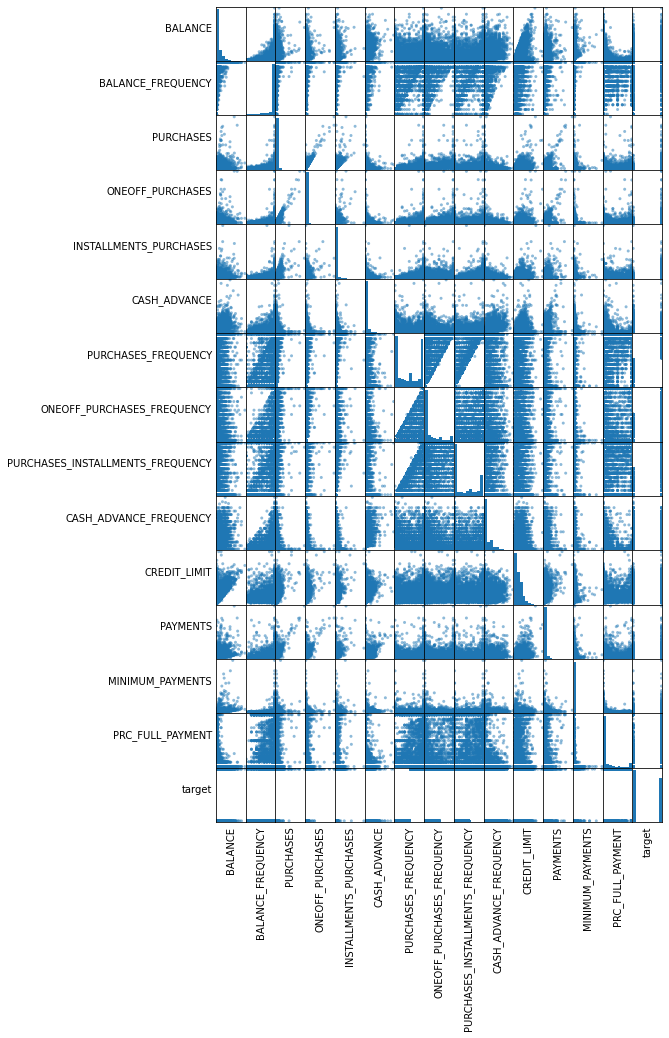

In [ ]:
# Plot scatter matrix between the columns 
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in training_cl.dtypes if t[1] == 'int' or t[1] == 'double']

sampled_data = training_cl.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(8, 15))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
# Correlation matrix between the input features and Class
import six
for i in training_cl.columns:
    if not( isinstance(training_cl.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Class for ", i, training_cl.stat.corr('target',i))

Correlation to Class for  BALANCE -0.057859712421735245
Correlation to Class for  BALANCE_FREQUENCY 0.2431212549738119
Correlation to Class for  PURCHASES 0.3538977873678623
Correlation to Class for  ONEOFF_PURCHASES 0.23656837443714865
Correlation to Class for  INSTALLMENTS_PURCHASES 0.4020578361665616
Correlation to Class for  CASH_ADVANCE -0.17088024750624253
Correlation to Class for  PURCHASES_FREQUENCY 0.9178944269853585
Correlation to Class for  ONEOFF_PURCHASES_FREQUENCY 0.4490101142301152
Correlation to Class for  PURCHASES_INSTALLMENTS_FREQUENCY 0.798918146252267
Correlation to Class for  CASH_ADVANCE_FREQUENCY -0.24354911963745834
Correlation to Class for  CASH_ADVANCE_TRX -0.155168623483919
Correlation to Class for  PURCHASES_TRX 0.5176416770591831
Correlation to Class for  CREDIT_LIMIT 0.10493081759365298
Correlation to Class for  PAYMENTS 0.10065122200909772
Correlation to Class for  MINIMUM_PAYMENTS 0.012805165805485921
Correlation to Class for  PRC_FULL_PAYMENT 0.2754456

This would guide my decision towards feature selection for my classification model.

### **Prep Data for Machine Learning with Pyspar**k

Prepare Data for Machine Learning algorithm. Divide data into only two columns since spark support two columns only, one for features and the second one is label [Class/Y]

In [ ]:
# Spark support only two columns during training one for features and second one is labels
# Vector Assembler is used to assemble all the features used for training 
# Y (Class) in the label where to train a Classification model for estimating the 
# default payment

from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['PURCHASES_FREQUENCY', 'BALANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
    'PRC_FULL_PAYMENT', 'PURCHASES', 'CASH_ADVANCE_FREQUENCY'], outputCol = 'features')


default_df = vectorAssembler.transform(training_cl)

default_df= default_df.select(['features', 'target'])
default_df.show()


+--------------------+------+
|            features|target|
+--------------------+------+
|[0.916667,105.069...|   1.0|
|(6,[1,5],[2446.70...|   0.0|
|(6,[1,5],[295.374...|   0.0|
|[1.0,822.755885,0...|   1.0|
|[0.0,4433.582508,...|   0.0|
|(6,[1,5],[2785.58...|   0.0|
|[0.833333,10116.7...|   1.0|
|(6,[1,5],[9440.79...|   0.0|
|[0.333333,1435.97...|   0.0|
|[1.0,1160.514847,...|   1.0|
|[0.083333,634.759...|   0.0|
|[1.0,45.785125,0....|   1.0|
|[0.166667,968.504...|   0.0|
|[1.0,200.806352,0...|   1.0|
|[0.583333,1634.55...|   1.0|
|[0.5,1839.926709,...|   0.0|
|[1.0,6743.313868,...|   1.0|
|(6,[1,5],[1267.05...|   0.0|
|[0.166667,2778.73...|   0.0|
|[0.333333,1138.59...|   0.0|
+--------------------+------+
only showing top 20 rows



In [ ]:
# Splitting data into training and testing 80% training and 20% testing
weights = [.8, .2]
#seed = 42 # seed=0L
rawTrainData, rawValidationData = default_df.randomSplit(weights)

In [ ]:
rawValidationData .show(100) #test dataset

+--------------------+------+
|            features|target|
+--------------------+------+
|(6,[1,5],[4.81721...|   0.0|
|(6,[1,5],[37.3247...|   0.0|
|(6,[1,5],[40.7642...|   0.0|
|(6,[1,5],[45.1608...|   0.0|
|(6,[1,5],[46.9965...|   0.0|
|(6,[1,5],[71.8373...|   0.0|
|(6,[1,5],[85.9007...|   0.0|
|(6,[1,5],[116.172...|   0.0|
|(6,[1,5],[123.822...|   0.0|
|(6,[1,5],[134.613...|   0.0|
|(6,[1,5],[137.507...|   0.0|
|(6,[1,5],[150.897...|   0.0|
|(6,[1,5],[153.602...|   0.0|
|(6,[1,5],[173.075...|   0.0|
|(6,[1,5],[174.909...|   0.0|
|(6,[1,5],[195.361...|   0.0|
|(6,[1,5],[197.159...|   0.0|
|(6,[1,5],[211.162...|   0.0|
|(6,[1,5],[214.592...|   0.0|
|(6,[1,5],[218.890...|   0.0|
|(6,[1,5],[229.272...|   0.0|
|(6,[1,5],[249.489...|   0.0|
|(6,[1,5],[298.651...|   0.0|
|(6,[1,5],[300.819...|   0.0|
|(6,[1,5],[303.740...|   0.0|
|(6,[1,5],[312.197...|   0.0|
|(6,[1,5],[323.801...|   0.0|
|(6,[1,5],[324.334...|   0.0|
|(6,[1,5],[350.306...|   0.0|
|(6,[1,5],[376.997...|   0.0|
|(6,[1,5],

### **Logistic Regression- Classification**

In [ ]:
# training the logistic regression madel
from pyspark.ml.classification import LogisticRegression
lr =  LogisticRegression(featuresCol = 'features', 
                         labelCol='target', maxIter=10, regParam=0.3, elasticNetParam=0.8)

lr_model = lr.fit(rawTrainData)

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [1.6735319539883504,0.0,0.20236884315549838,0.0,0.0,0.0]
Intercept: -1.0743069568479464


In [ ]:
# Summary of the training data 
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier step

trainingSummary = lr_model.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.6909642284923642
0.6804386095922033
0.6523831617465304
0.6463881327943434
0.6228766291967845
0.6175130865995994
0.6157398706208057
0.6142618359967075
0.6138514489607172
0.6125688172646736
0.6124232516380379
+---+-------------------+
|FPR|                TPR|
+---+-------------------+
|0.0|                0.0|
|0.0| 0.3739886125262212|
|0.0|0.38267905304165417|
|0.0| 0.3958645489961043|
|0.0| 0.4294276296074318|
|0.0| 0.4396164219358705|
|0.0| 0.4408151033862751|
|0.0|0.44920587353910696|
|0.0|0.44980521426430925|
|0.0| 0.4626910398561582|
|0.0| 0.4632903805813605|
|0.0|0.47228049145939466|
|0.0|0.47677554689841173|
|0.0| 0.4824692837878334|
|0.0| 0.5151333533113575|
|0.0| 0.5418040155828588|
|0.0| 0.5495954450104885|
|0.0| 0.5954450104884627|
|0.0| 0.6053341324543002|
|0.0| 0.6074318249925083|
+---+-------------------+
only showing top 20 rows

areaUnderROC: 0.9999831637023899


LogisticRegression_b74ebf22427d

In [ ]:
rawTrainData.describe().show()

+-------+-------------------+
|summary|             target|
+-------+-------------------+
|  count|               7146|
|   mean|0.46697453120626925|
| stddev| 0.4989430380960091|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+



### **Testing the Logistic Regression (Classification Model)**

In [ ]:
# Testing the trained logistic regression model

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr_predictions = lr_model.transform(rawValidationData)
lr_predictions.select("prediction","target","features").show(8)

# Select (prediction, true label) and compute test error

evaluator = MulticlassClassificationEvaluator(
    labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(lr_predictions)

print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

+----------+------+--------------------+
|prediction|target|            features|
+----------+------+--------------------+
|       0.0|   0.0|(6,[1,5],[4.81721...|
|       0.0|   0.0|(6,[1,5],[37.3247...|
|       0.0|   0.0|(6,[1,5],[40.7642...|
|       0.0|   0.0|(6,[1,5],[45.1608...|
|       0.0|   0.0|(6,[1,5],[46.9965...|
|       0.0|   0.0|(6,[1,5],[71.8373...|
|       0.0|   0.0|(6,[1,5],[85.9007...|
|       0.0|   0.0|(6,[1,5],[116.172...|
+----------+------+--------------------+
only showing top 8 rows

Test Error = 0.0199557 
Accuracy = 0.980044 


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="target")
ART = areaUnderROC_Test.evaluate(lr_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9998161810368383


## **Clustering with Pyspark**



**Bisecting k-means**


Bisecting k-means is a kind of hierarchical clustering using a divisive (or “top-down”) approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

Bisecting K-means can often be much faster than regular K-means, but it will generally produce a different clustering.

BisectingKMeans is implemented as an Estimator and generates a BisectingKMeansModel as the base model.




In [ ]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator


# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(2).setSeed(1)
model = bkm.fit(default_df)

# Make predictions
predictions_cl = model.transform(default_df)


# Silhouette score
# Evaluate the predictions using the Silhouette score.
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions_cl)
print("Silhouette with squared euclidean distance = " + str(silhouette))




# Shows the result.
print("Cluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.7647965640889247
Cluster Centers: 
[4.82562570e-01 8.85739513e+02 3.57625981e-01 1.72003256e-01
 7.22821457e+02 1.09915274e-01]
[5.36097446e-01 5.55139318e+03 4.04447545e-01 4.62866390e-02
 2.65018799e+03 2.83339922e-01]


**Prediction**

In [ ]:
predictions_cl.select("features","prediction").limit(5).toPandas()

,features,prediction
0,"[0.916667, 105.069311, 0.0, 0.25, 1344.87, 0.0]",0
1,"(0.0, 2446.709596, 0.0, 0.0, 0.0, 0.25)",0
2,"(0.0, 295.374207, 0.0, 0.0, 0.0, 0.25)",0
3,"[1.0, 822.755885, 0.571429, 0.0, 531.14, 0.0]",0
4,"[0.0, 4433.582508, 0.0, 0.083333, 0.0, 0.416667]",1


###  **Cluster frequencies**

In [ ]:
predictions_cl.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 1302|
|         0| 7648|
+----------+-----+



### **Note:**

**Use toPandas restrictedly:** We want to avoid loading data into memory, calling toPandas() would do this and actually prevent operations from being performed in a distributed mode. Though it could be used say when the data is already aggregated, yet avoid using it for large dataframes.